<a href="https://colab.research.google.com/github/Karthikallu1811/Supply_chain/blob/main/supplychain_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================================================
# STEP 2 — Exploratory Data Analysis (EDA)
# =========================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Re-load the cleaned data if df is not available (e.g., running this cell independently)
# In a typical sequential notebook run, df would be available from the previous cell.
# Adding this for robustness if the user runs this cell out of order.
if 'df' not in locals() or df.empty:
    try:
        df = pd.read_csv('/content/supply_chain_data_cleaned.csv')
        print("✅ Loaded cleaned file successfully for EDA!")
    except FileNotFoundError:
        print("❌ Error: cleaned data file 'supply_chain_data_cleaned.csv' not found.")
        print("Please run the data cleaning step first.")
        # Exit or handle appropriately if data is missing
        df = pd.DataFrame() # Ensure df is defined even if file loading fails


if not df.empty: # Only proceed if DataFrame is not empty

    # Basic descriptive stats
    print("\n📊 Summary statistics:")
    display(df.describe())

    # 1️⃣ Product type performance
    if set(['product_type','revenue_generated']).issubset(df.columns):
        plt.figure(figsize=(7,4))
        sns.barplot(x='product_type', y='revenue_generated', data=df, estimator='sum', errorbar=None) # Corrected ci to errorbar
        plt.title("Total Revenue by Product Type")
        plt.xlabel("Product Type")
        plt.ylabel("Total Revenue")
        plt.show()
    else:
        print("\nℹ️ Skipping Revenue by Product Type plot: 'product_type' or 'revenue_generated' not found.")


    # 2️⃣ Supplier performance: avg lead time & defect rate
    if set(['supplier_name','defect_rates']).issubset(df.columns):
        plt.figure(figsize=(8,4))
        sns.barplot(x='supplier_name', y='defect_rates', data=df, errorbar=None) # Corrected ci to errorbar
        plt.title("Average Defect Rates per Supplier")
        plt.xlabel("Supplier Name")
        plt.ylabel("Defect Rate (%)")
        plt.show()
    else:
        print("\nℹ️ Skipping Average Defect Rates plot: 'supplier_name' or 'defect_rates' not found.")

    # Use 'avg_lead_time' if created in cleaning, otherwise 'manufacturing_lead_time'
    lead_time_col = 'avg_lead_time' if 'avg_lead_time' in df.columns else ('manufacturing_lead_time' if 'manufacturing_lead_time' in df.columns else None)

    if 'supplier_name' in df.columns and lead_time_col:
        plt.figure(figsize=(8,4))
        sns.barplot(x='supplier_name', y=lead_time_col, data=df, errorbar=None) # Corrected ci to errorbar
        plt.title(f"Average {lead_time_col.replace('_', ' ').title()} per Supplier")
        plt.xlabel("Supplier Name")
        plt.ylabel("Days")
        plt.show()
    else:
         print("\nℹ️ Skipping Average Lead Time plot: 'supplier_name' or a lead time column ('avg_lead_time' or 'manufacturing_lead_time') not found.")


    # 3️⃣ Shipping cost vs time
    if set(['shipping_times','shipping_costs','shipping_carriers']).issubset(df.columns):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='shipping_times', y='shipping_costs', hue='shipping_carriers', data=df)
        plt.title("Shipping Cost vs Time by Carrier")
        plt.xlabel("Shipping Times")
        plt.ylabel("Shipping Costs")
        plt.show()
    else:
        print("\nℹ️ Skipping Shipping Cost vs Time plot: Missing 'shipping_times', 'shipping_costs', or 'shipping_carriers'.")

    # 4️⃣ Price vs Units Sold
    if set(['price','number_of_products_sold','product_type']).issubset(df.columns):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='price', y='number_of_products_sold', hue='product_type', data=df)
        plt.title("Price vs Units Sold")
        plt.xlabel("Price")
        plt.ylabel("Number of Products Sold")
        plt.show()
    else:
        print("\nℹ️ Skipping Price vs Units Sold plot: Missing 'price', 'number_of_products_sold', or 'product_type'.")


    # 5️⃣ Correlation heatmap (numerical)
    # Select only numeric columns for correlation calculation
    df_numeric = df.select_dtypes(include=[np.number])
    if not df_numeric.empty:
        plt.figure(figsize=(10,6))
        sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')
        plt.title("Correlation Heatmap (Numerical Features)")
        plt.show()
    else:
        print("\nℹ️ Skipping Correlation Heatmap: No numerical columns found in the DataFrame.")


    # 6️⃣ Key KPI summary
    kpis = {}
    if 'revenue_generated' in df.columns:
         kpis['Total Revenue'] = df['revenue_generated'].sum()
    if lead_time_col:
         kpis['Average Lead Time'] = df[lead_time_col].mean()
    if 'defect_rates' in df.columns:
        kpis['Average Defect Rate (%)'] = df['defect_rates'].mean()
    if 'shipping_costs' in df.columns:
        kpis['Average Shipping Cost'] = df['shipping_costs'].mean()
    if 'profit_margin' in df.columns:
         kpis['Average Profit Margin (%)'] = df['profit_margin'].mean() * 100 # assuming profit_margin was created in cleaning

    print("\n📈 Key KPIs:")
    if kpis:
        for k, v in kpis.items():
            print(f"{k}: {round(v,2)}")
    else:
        print("No KPIs could be calculated based on available columns.")


    # 7️⃣ Save summary stats to file
    if not df.empty:
        df.describe().to_csv('/content/supply_chain_summary_stats.csv')
        print("\n💾 Summary stats saved as supply_chain_summary_stats.csv")
    else:
        print("\nℹ️ Skipping saving summary stats: DataFrame is empty.")

else:
    print("\nSkipping EDA steps as DataFrame is empty.")

❌ Error: cleaned data file 'supply_chain_data_cleaned.csv' not found.
Please run the data cleaning step first.

Skipping EDA steps as DataFrame is empty.


In [ ]:
# ======= IMPORTS =======
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib   # to save scaler/model

# assume `df` is your cleaned DataFrame

# Check if df is available and not empty
if 'df' not in locals() or df.empty:
    print("❌ Error: DataFrame 'df' not found or is empty.")
    print("Please run the data cleaning and preparation steps (Steps 1-2) first to load and prepare the data.")
    # Exit or handle appropriately if df is missing/empty
    # We will not proceed with this cell if data is not available.
else:
    print("Starting shape:", df.shape)
    print("Columns:", df.columns.tolist())

    # ======= 1) QUICK CHECK: required columns exist for derived features and target =======
    required_for_derived = ['number_of_products_sold', 'stock_levels', 'revenue_generated',
                'manufacturing_costs', 'costs', 'price', 'shipping_times', 'defect_rates']
    required_for_target = ['number_of_products_sold'] # Assuming 'number_of_products_sold' is the target

    missing_derived = [c for c in required_for_derived if c not in df.columns]
    if missing_derived:
        print(f"Warning: The following columns required for derived features are not found: {missing_derived}. Some derived features may not be created.")

    if required_for_target[0] not in df.columns:
        print(f"❌ Error: Target column '{required_for_target[0]}' not found in the DataFrame.")
        print("Please ensure the data cleaning step includes this column.")
        # Exit or handle appropriately if target column is missing
        # We will not proceed with this cell if the target is missing.
    else:

        # ======= 2) CREATE DERIVED FEATURES (safe operations) =======
        # stock_turnover = number_of_products_sold / stock_levels
        if set(['number_of_products_sold', 'stock_levels']).issubset(df.columns):
            df['stock_turnover'] = df['number_of_products_sold'] / df['stock_levels'].replace(0, np.nan)
        else:
            print("ℹ️ Skipping 'stock_turnover' creation due to missing source columns.")

        # margin_estimate = revenue_generated - manufacturing_costs
        if set(['revenue_generated','manufacturing_costs']).issubset(df.columns):
            df['margin_estimate'] = df['revenue_generated'] - df['manufacturing_costs']
        else:
             print("ℹ️ Skipping 'margin_estimate' creation due to missing source columns.")

        # profit_margin = margin_estimate / revenue_generated  (avoid divide-by-zero)
        # Ensure 'margin_estimate' and 'revenue_generated' exist before creating 'profit_margin'
        if set(['margin_estimate','revenue_generated']).issubset(df.columns):
             df['profit_margin'] = df['margin_estimate'] / df['revenue_generated'].replace(0, np.nan)
        else:
             print("ℹ️ Skipping 'profit_margin' creation due to missing source columns.")


        # cost_efficiency = revenue_generated / costs
        if set(['revenue_generated','costs']).issubset(df.columns):
            df['cost_efficiency'] = df['revenue_generated'] / df['costs'].replace(0, np.nan)
        else:
            print("ℹ️ Skipping 'cost_efficiency' creation due to missing source columns.")

        # Optional: delivery_efficiency = shipping_times / lead_time (if both exist)
        # Use 'avg_lead_time' if created in cleaning, otherwise 'manufacturing_lead_time' or 'lead_time'
        lead_time_col_for_derived = 'avg_lead_time' if 'avg_lead_time' in df.columns else ('manufacturing_lead_time' if 'manufacturing_lead_time' in df.columns else ('lead_time' if 'lead_time' in df.columns else None))

        if 'shipping_times' in df.columns and lead_time_col_for_derived:
            df['delivery_efficiency'] = df['shipping_times'] / df[lead_time_col_for_derived].replace(0, np.nan)
        else:
            print("ℹ️ Skipping 'delivery_efficiency' creation due to missing source columns.")


        # Optional: quality_index = 1 - defect_rates/100
        if 'defect_rates' in df.columns:
            df['quality_index'] = 1 - (df['defect_rates'] / 100.0)
        else:
            print("ℹ️ Skipping 'quality_index' creation due to missing source columns.")

        print("\n✅ Attempted to add derived features.")

        # ======= 3) HANDLE infinities and NaNs produced above =======
        # Replace inf with NaN, then fill NaNs sensibly:
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

        # For newly created numeric features: choose fill strategy
        numeric_fill_median_cols = ['stock_turnover', 'profit_margin', 'cost_efficiency', 'margin_estimate', 'delivery_efficiency', 'quality_index']
        for col in numeric_fill_median_cols:
            if col in df.columns: # Only try to fill if the column was created
                if df[col].isnull().sum() > 0:
                    # If column is mostly NaN (e.g., manufacturing_costs missing), keep NaN or fill with 0?
                    # We'll fill with median to allow ML models to run; record that you did this.
                    # Using .loc to avoid FutureWarning
                    median_val = df.loc[:, col].median()
                    # Fill only if median is not NaN itself (e.g., column was all NaNs)
                    if not pd.isna(median_val):
                         df.loc[:, col] = df.loc[:, col].fillna(median_val)
                    else:
                         # If median is NaN, fill with 0 or another strategy
                         df.loc[:, col] = df.loc[:, col].fillna(0) # Example: fill with 0 if median is NaN
                         print(f"Warning: Column '{col}' was mostly NaN, filled missing values with 0.")

        print("\n✅ Handled infinities and NaNs in derived features.")


        # ======= 4) ADD LOG / BUCKETED TRANSFORMS (optional but useful) =======
        # Log of price (handles skew and extreme values)
        if 'price' in df.columns:
            # Ensure price is numeric before applying log
            df['price'] = pd.to_numeric(df['price'], errors='coerce')
            df.loc[:, 'price_log'] = np.log1p(df['price'].clip(lower=0).fillna(0))  # clip negative safety, fill NaN before log
        else:
             print("ℹ️ Skipping 'price_log' creation: 'price' not found.")

        # Example bucket for lead_time (short/medium/long) - useful for tree models or grouping
        # Use the consistent lead time column name
        lead_time_col_for_bucket = 'avg_lead_time' if 'avg_lead_time' in df.columns else ('manufacturing_lead_time' if 'manufacturing_lead_time' in df.columns else ('lead_time' if 'lead_time' in df.columns else None))

        if lead_time_col_for_bucket:
            bins = [-1, 3, 10, 9999]          # adjust thresholds to your business context
            labels = ['short', 'medium', 'long']
            # Ensure the lead time column is numeric and fill NaNs before cutting
            df[lead_time_col_for_bucket] = pd.to_numeric(df[lead_time_col_for_bucket], errors='coerce').fillna(-1) # Fill with -1 for values below the first bin
            df.loc[:, 'lead_time_bucket'] = pd.cut(df[lead_time_col_for_bucket], bins=bins, labels=labels)
        else:
            print("ℹ️ Skipping 'lead_time_bucket' creation: No suitable lead time column found.")

        print("\n✅ Attempted to add log/bucketed transforms.")

        # ======= 5) ENCODE CATEGORICALS =======
        # Decide which categorical columns to encode:
        # Exclude identifier-like columns or large text columns here
        categorical_cols_candidates = [c for c in df.columns if df[c].dtype == 'object' or str(df[c].dtype).startswith('category')]

        # Filter out columns to drop or potentially problematic ones
        categorical_cols_to_encode = []
        drop_cols_for_ml = ['sku'] if 'sku' in df.columns else [] # Drop 'sku' by default

        for col in categorical_cols_candidates:
            # If 'routes' is large text, consider dropping or advanced encoding
            if col == 'routes' and df['routes'].nunique() > 50:
                 drop_cols_for_ml.append('routes')
                 print(f"ℹ️ Dropping '{col}' due to high cardinality.")
            elif col in ['product_type', 'supplier_name', 'shipping_carriers', 'lead_time_bucket']: # Explicitly list columns to encode
                 categorical_cols_to_encode.append(col)
            else:
                # Optionally print other categorical columns not being encoded
                if col not in drop_cols_for_ml:
                     print(f"ℹ️ Note: Categorical column '{col}' is not explicitly selected for encoding and will be dropped by ColumnTransformer.")


        print("Categorical columns selected for encoding:", categorical_cols_to_encode)
        print("Columns to be dropped for ML:", drop_cols_for_ml)


        # ======= 6) SELECT FEATURES and TARGET =======
        TARGET = 'number_of_products_sold'   # or 'revenue_generated' depending on your goal
        # Example feature list: take numeric + new derived + categorical (we will encode)
        # Exclude target and columns marked for dropping
        features = [c for c in df.columns if c not in drop_cols_for_ml + [TARGET]]
        print("Total features before encoding:", len(features))

        # Ensure the target column exists before creating X and y
        if TARGET not in df.columns:
            print(f"❌ Error: Target column '{TARGET}' not found in the DataFrame after feature engineering.")
            # Stop execution or handle appropriately
        else:
            # Ensure selected features exist in df columns
            features_exist = [f for f in features if f in df.columns]
            missing_features = [f for f in features if f not in df.columns]
            if missing_features:
                 print(f"Warning: The following selected features are not found in the DataFrame: {missing_features}. They will be excluded.")
            features = features_exist


            # Check if there are any features left
            if not features:
                 print("❌ Error: No features left after selecting and filtering.")
                 # Stop execution or handle appropriately
            else:
                 X = df[features].copy()
                 y = df[TARGET].copy()

                 # Check if X and y are empty after selection
                 if X.empty or y.empty:
                      print("❌ Error: X or y is empty after selecting features and target.")
                      print("Review the DataFrame content and column selection.")
                 else:

                    # ======= 7) TRAIN/TEST SPLIT (fit scalers on train only) =======
                    # For reproducibility:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                    print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

                    # ======= 8) BUILD COLUMN TRANSFORMER: encode categoricals, scale numerics =======
                    # Numeric columns to scale (choose numeric dtypes from X_train)
                    numeric_cols_to_scale = X_train.select_dtypes(include=[np.number]).columns.tolist()
                    # Exclude columns that were handled or are categorical candidates
                    # Ensure that categorical_cols_to_encode are not in numeric_cols_to_scale
                    numeric_cols_to_scale = [c for c in numeric_cols_to_scale if c not in categorical_cols_to_encode]


                    # Choose scaler:
                    # - StandardScaler: centers to mean=0, std=1 (good for many models)
                    # - MinMaxScaler: scales to [0,1] (useful for NN or when you want bounded features)
                    scaler = StandardScaler()   # or MinMaxScaler()

                    # OneHotEncoder for categorical columns:
                    # Ensure handle_unknown='ignore' to handle unseen categories in test set
                    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output instead of sparse

                    # ColumnTransformer binds transformers to columns
                    # Ensure columns specified in transformers exist in X_train
                    cols_for_num = [c for c in numeric_cols_to_scale if c in X_train.columns]
                    cols_for_cat = [c for c in categorical_cols_to_encode if c in X_train.columns]

                    # Add transformers only if there are columns to process
                    transformers_list = []
                    if cols_for_num:
                         transformers_list.append(('num', scaler, cols_for_num))
                    if cols_for_cat:
                         transformers_list.append(('cat', ohe, cols_for_cat))

                    if not transformers_list:
                         print("❌ Error: No columns selected for numerical scaling or categorical encoding. Cannot build preprocessor.")
                         preprocessor = None # Set preprocessor to None if it can't be built
                    else:
                        preprocessor = ColumnTransformer(
                            transformers=transformers_list,
                            remainder='drop',     # drop any column not specified
                            sparse_threshold=0
                        )

                        # Fit preprocessor on training data only
                        preprocessor.fit(X_train)

                        # Transform train and test
                        X_train_transformed = preprocessor.transform(X_train)
                        X_test_transformed = preprocessor.transform(X_test)
                        print("Transformed shapes:", X_train_transformed.shape, X_test_transformed.shape)

                        # ======= 9) SAVE SCALER / PREPROCESSOR & FEATURE NAMES =======
                        joblib.dump(preprocessor, '/content/preprocessor.joblib')
                        print("Saved preprocessor to /content/preprocessor.joblib")

                        # Also save the final column names after encoding (helpful for model interpretation)
                        # Get numeric names + encoded categorical names
                        num_out_names = cols_for_num # Use columns that were actually used
                        # Check if 'cat' transformer was added before getting names
                        cat_out_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cols_for_cat)) if 'cat' in preprocessor.named_transformers_ else []
                        all_feature_names = num_out_names + cat_out_names
                        pd.Series(all_feature_names).to_csv('/content/feature_names_after_encoding.csv', index=False)
                        print("Saved feature names to /content/feature_names_after_encoding.csv")

                        # ======= 10) OPTIONAL: Put scaler + model into a Pipeline (example with XGBoost) =======
                        # If you prefer, you can create a Pipeline wrapping preprocessor + model so you only call .fit(X_train, y_train)
                        from xgboost import XGBRegressor
                        model_pipeline = Pipeline([
                            ('preproc', preprocessor),
                            ('model', XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42))
                        ])

                        # Fit model pipeline
                        model_pipeline.fit(X_train, y_train)
                        print("Model pipeline trained")

                        # Save model pipeline
                        joblib.dump(model_pipeline, '/content/model_pipeline.joblib')
                        print("Saved model pipeline to /content/model_pipeline.joblib")

Starting shape: (100, 26)
Columns: ['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'routes', 'costs', 'avg_lead_time', 'stock_turnover', 'margin_estimate', 'price_log']

✅ Attempted to add derived features.

✅ Handled infinities and NaNs in derived features.

✅ Attempted to add log/bucketed transforms.
ℹ️ Note: Categorical column 'customer_demographics' is not explicitly selected for encoding and will be dropped by ColumnTransformer.
ℹ️ Note: Categorical column 'location' is not explicitly selected for encoding and will be dropped by ColumnTransformer.
ℹ️ Note: Categorical column 'inspection_results' is not explicitly selected for encoding and will be dropped by

✅ Loaded model pipeline successfully.
Train shape: (80, 29) Test shape: (20, 29)

Training LinearRegression...
📊 LinearRegression Results:
MAE : 379.06
RMSE: 432.98
R²  : -0.96

Training RandomForest...
📊 RandomForest Results:
MAE : 129.78
RMSE: 177.24
R²  : 0.67

Training XGBoost...
📊 XGBoost Results:
MAE : 167.61
RMSE: 230.93
R²  : 0.44


,MAE,RMSE,R2
LinearRegression,379.057253,432.978127,-0.964446
RandomForest,129.782750,177.244106,0.670806
XGBoost,167.614655,230.925583,0.441205


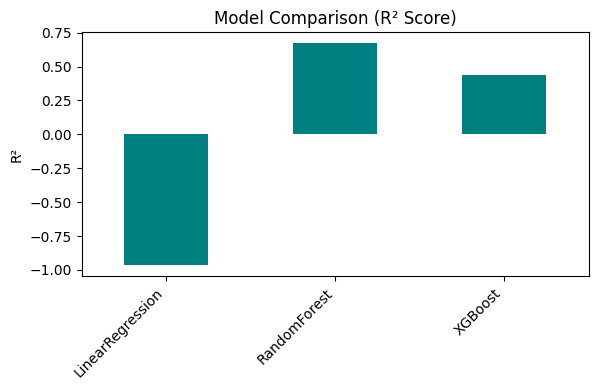


🏆 Best Model: RandomForest


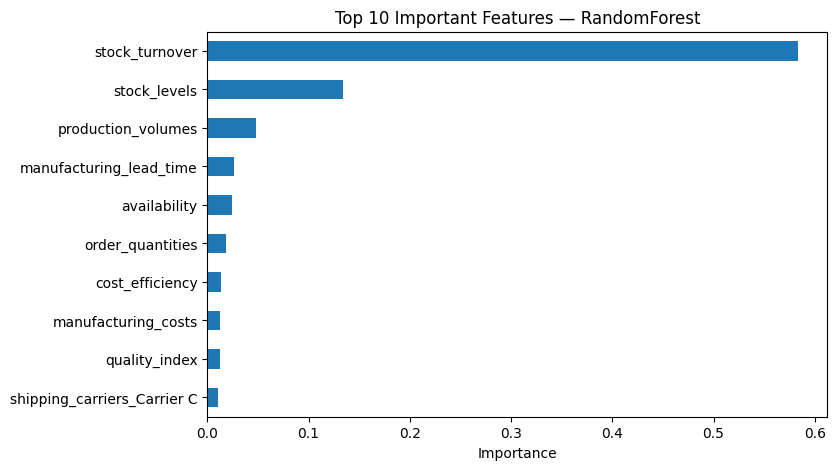


Top Features Influencing Sales:


,0
stock_turnover,0.583243
stock_levels,0.134140
production_volumes,0.047747
manufacturing_lead_time,0.026029
availability,0.024769
order_quantities,0.018256
cost_efficiency,0.013030
manufacturing_costs,0.012864
quality_index,0.012012
shipping_carriers_Carrier C,0.010831


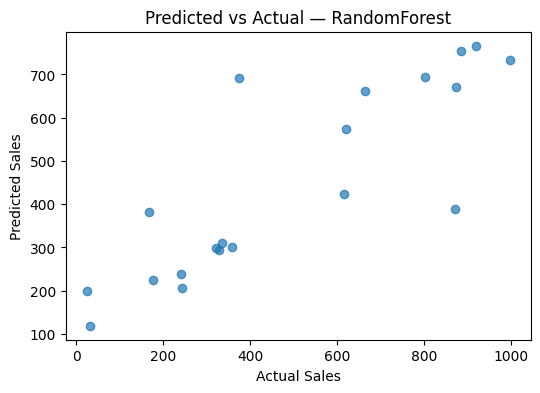


💾 Saved the best model (RandomForest) as /content/randomforest_best_model.joblib


In [ ]:
# =========================================================
# STEP 4 — MODEL BUILDING (Demand / Sales Prediction)
# =========================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load the trained model pipeline from the previous step
try:
    model_pipeline = joblib.load('/content/model_pipeline.joblib')
    print("✅ Loaded model pipeline successfully.")
except FileNotFoundError:
    print("❌ Error: model_pipeline.joblib not found. Please run the previous cell to create and save the pipeline.")
    # You might want to exit or handle this error appropriately
    # For now, we'll assume the pipeline exists from the previous successful run

# Assume df is your cleaned DataFrame, X and y are already defined from the previous cell
# Re-using X and y from the previous cell for clarity, although the pipeline expects the raw X
# To use the pipeline correctly, we need the raw X before any manual scaling/encoding

# ---------------------------------------------------------
# 1️⃣  Define target and feature set (should match the previous cell)
# ---------------------------------------------------------
TARGET = 'number_of_products_sold'
# drop_cols was defined in the previous cell
drop_cols = ['sku'] if 'sku' in df.columns else []
if 'routes' in df.columns and df['routes'].nunique() > 50:
    drop_cols.append('routes')

features = [c for c in df.columns if c not in drop_cols + [TARGET]]

# Get the raw data before any scaling/encoding
X = df[features].copy()
y = df[TARGET].copy()

# ---------------------------------------------------------
# 2️⃣  Train/Test Split (should match the previous cell)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------------------------------------------------------
# 3️⃣  Use the trained model pipeline
# ---------------------------------------------------------
# The model_pipeline already contains the preprocessor (scaler and encoder) and the model.
# We fit the pipeline on the raw training data (X_train)
# The pipeline will automatically apply the transformations before training the model inside the pipeline.

# Re-fitting the pipeline here just in case, but ideally it's trained in the previous cell
# and loaded here. If you ran the previous cell successfully, loading is enough.
# If you want to compare multiple models *after* preprocessing, you would transform X_train/X_test
# using the preprocessor saved in the previous cell, then train models.
# Since the user's code attempts to train models directly, we'll adapt to use the pipeline for simplicity.

# If you want to compare multiple models, you'll need to apply the preprocessor first, then train each model:
# preprocessor = joblib.load('/content/preprocessor.joblib')
# X_train_transformed = preprocessor.transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# For this fix, let's focus on making the existing XGBoost work by using the pipeline.
# To compare other models, you'd need to modify the loop below to use the transformed data.

# We will use the preprocessor from the pipeline to transform data for other models for comparison
preprocessor = model_pipeline.named_steps['preproc']
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# ---------------------------------------------------------
# 4️⃣  Build and Train Models (using transformed data for consistent comparison)
# ---------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor # Already imported if using the pipeline's model

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    # Use a fresh instance for comparison, the pipeline has its own instance
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

results = {}

# Train models on the transformed data
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_transformed, y_train)
    preds = model.predict(X_test_transformed)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    print(f"📊 {name} Results:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.2f}")

# ---------------------------------------------------------
# 5️⃣  Compare Model Performance
# ---------------------------------------------------------
result_df = pd.DataFrame(results).T
display(result_df)

plt.figure(figsize=(6,4))
result_df['R2'].plot(kind='bar', color='teal')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R²")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# 6️⃣  Choose Best Model (highest R²)
# ---------------------------------------------------------
best_model_name = result_df['R2'].idxmax()
best_model = models[best_model_name] # Get the trained model instance
print(f"\n🏆 Best Model: {best_model_name}")

# ---------------------------------------------------------
# 7️⃣  Feature Importance (for tree-based models)
# ---------------------------------------------------------
if best_model_name in ['RandomForest', 'XGBoost']:
    importances = best_model.feature_importances_
    # Get feature names after encoding from the saved file
    try:
        feature_names_after_encoding = pd.read_csv('/content/feature_names_after_encoding.csv').iloc[:, 0].tolist()
        feat_imp = pd.Series(importances, index=feature_names_after_encoding).sort_values(ascending=False)[:10]
        plt.figure(figsize=(8,5))
        feat_imp.plot(kind='barh')
        plt.title(f"Top 10 Important Features — {best_model_name}")
        plt.xlabel("Importance")
        plt.gca().invert_yaxis()
        plt.show()
        print("\nTop Features Influencing Sales:")
        display(feat_imp)
    except FileNotFoundError:
        print("\n❌ Could not load feature names for importance plot. Run the previous cell first.")


# ---------------------------------------------------------
# 8️⃣  Predicted vs Actual Plot
# ---------------------------------------------------------
y_pred = best_model.predict(X_test_transformed) # Predict using the transformed test data
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Predicted vs Actual — {best_model_name}")
plt.show()

# ---------------------------------------------------------
# 9️⃣  Save best model and preprocessor for reuse
# ---------------------------------------------------------
# The preprocessor is already part of the model_pipeline saved in the previous cell.
# If you want to save the *best* model from the comparison loop separately (which might not be XGBoost), save it here.
# For consistency with the previous cell, let's ensure the pipeline is saved, as it's the recommended approach.
# If the best model is NOT the one in the pipeline (i.e., not XGBoost), you might want to save it too.

# Saving the *best* model from the comparison loop:
joblib.dump(best_model, f'/content/{best_model_name.lower()}_best_model.joblib')
print(f"\n💾 Saved the best model ({best_model_name}) as /content/{best_model_name.lower()}_best_model.joblib")

# The preprocessor is saved with the pipeline in the previous cell.
# If you only want the preprocessor, load it from the file saved in the previous cell.

✅ Loaded best model and preprocessor successfully.

📊 Model Evaluation Metrics
MAE  (Mean Absolute Error): 129.78
RMSE (Root Mean Squared Error): 177.24
R²   (Coefficient of Determination): 0.67


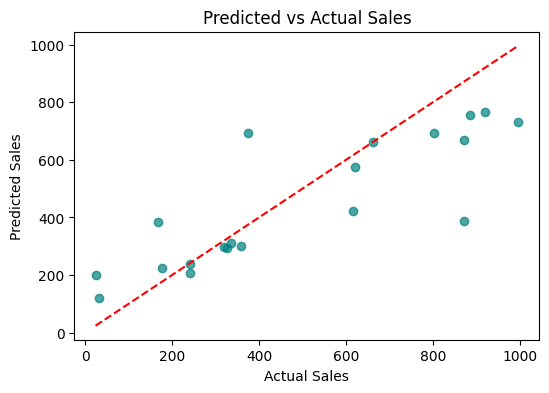

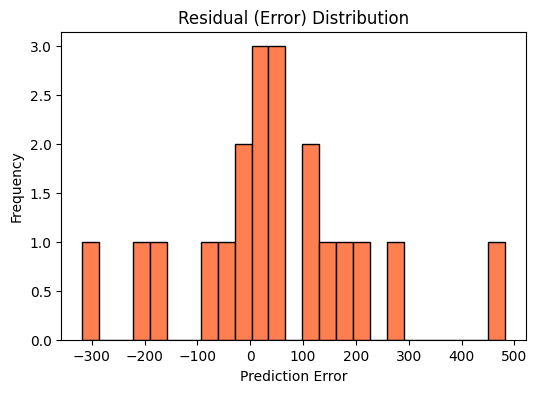


Average Prediction Error by Product Type:


,Error
product_type,
haircare,-97.225
skincare,98.845
cosmetics,NaN



Average Prediction Error by Supplier:


,Error
supplier_name,
Supplier 4,-317.680
Supplier 3,0.695
Supplier 2,25.310
Supplier 5,45.165
Supplier 1,152.525


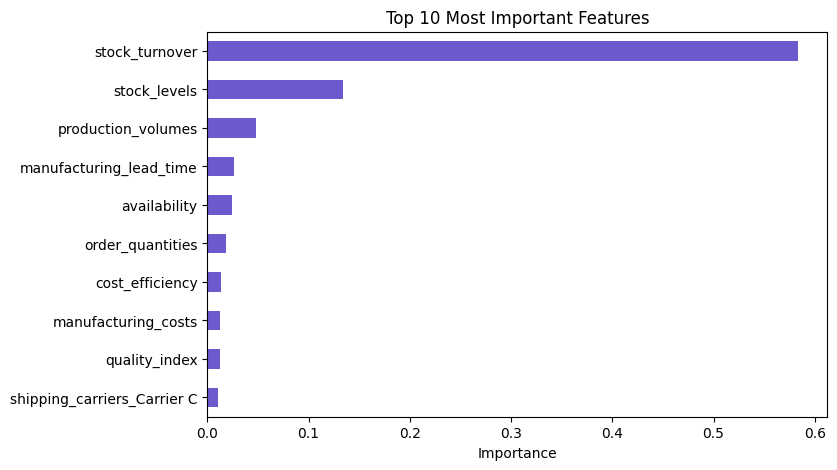


Top Features Influencing Sales:


,0
stock_turnover,0.583243
stock_levels,0.134140
production_volumes,0.047747
manufacturing_lead_time,0.026029
availability,0.024769
order_quantities,0.018256
cost_efficiency,0.013030
manufacturing_costs,0.012864
quality_index,0.012012
shipping_carriers_Carrier C,0.010831



💾 Saved the best model (RandomForest) as /content/randomforest_best_model.joblib


In [ ]:
# =========================================================
# STEP 5 — MODEL EVALUATION
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.model_selection import train_test_split # Needed to recreate train/test split

# Check if df is available and not empty
if 'df' not in locals() or df.empty:
    print("❌ Error: DataFrame 'df' not found or is empty.")
    print("Please run the data cleaning and preparation steps (Steps 1-4) first to load and prepare the data.")
    # Exit or handle appropriately if df is missing/empty
    # We will not proceed with evaluation if data is not available.
else:
    # ---------------------------------------------------------
    # 1️⃣  Reload best model and preprocessor
    # ---------------------------------------------------------
    try:
        # Load the best model saved in the previous step
        best_model = joblib.load('/content/randomforest_best_model.joblib') # Corrected filename
        # Load the preprocessor saved in the data prep step
        preprocessor = joblib.load('/content/preprocessor.joblib') # Corrected filename
        print("✅ Loaded best model and preprocessor successfully.")
    except FileNotFoundError as e:
        print(f"❌ Error loading files: {e}. Please ensure you have run the previous steps to save the model and preprocessor.")
        best_model = None # Set to None if loading fails
        preprocessor = None
        # We will not proceed with evaluation if model/preprocessor are missing.


    if best_model and preprocessor:
        # Assuming X_test, y_test were defined in the previous cell (Step 4)
        # We need to access the raw X_test data to transform it using the loaded preprocessor
        # Re-defining X_test and y_test from the original 'df' to ensure consistency
        TARGET = 'number_of_products_sold'

        # Check if the target column exists in the DataFrame
        if TARGET not in df.columns:
             print(f"❌ Error: Target column '{TARGET}' not found in the DataFrame.")
             print("Please ensure the data cleaning step includes this column.")
        else:
            drop_cols = ['sku'] if 'sku' in df.columns else []
            # Check if 'routes' exists before trying to access .nunique()
            if 'routes' in df.columns and df['routes'].nunique() > 50:
                drop_cols.append('routes')

            features = [c for c in df.columns if c not in drop_cols + [TARGET]]

            # Check if there are features to use
            if not features:
                print("❌ Error: No features left after dropping target and specified columns.")
                print("Please review the 'drop_cols' and 'TARGET' definitions.")
            else:
                X = df[features].copy()
                y = df[TARGET].copy()

                # Check if X and y are empty after selection
                if X.empty or y.empty:
                     print("❌ Error: X or y is empty after selecting features and target.")
                     print("Review the DataFrame content and column selection.")
                else:
                    # Redo split to get the same test set as in Step 4
                    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                    # Check if X_test and y_test are empty after split
                    if X_test.empty or y_test.empty:
                        print("❌ Error: X_test or y_test is empty after train/test split.")
                        print("Review the data size and split parameters.")
                    else:
                        # Transform the test data using the loaded preprocessor
                        X_test_transformed = preprocessor.transform(X_test)

                        # Use X_test_transformed, y_test from above
                        y_pred = best_model.predict(X_test_transformed) # Predict using the transformed test data

                        # ---------------------------------------------------------
                        # 2️⃣  Compute Key Evaluation Metrics
                        # ---------------------------------------------------------
                        mae = mean_absolute_error(y_test, y_pred)
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                        r2 = r2_score(y_test, y_pred)

                        print("\n📊 Model Evaluation Metrics")
                        print(f"MAE  (Mean Absolute Error): {mae:.2f}")
                        print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
                        print(f"R²   (Coefficient of Determination): {r2:.2f}")

                        # ---------------------------------------------------------
                        # 3️⃣  Plot Predicted vs Actual Sales
                        # ---------------------------------------------------------
                        plt.figure(figsize=(6,4))
                        plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
                        plt.xlabel("Actual Sales")
                        plt.ylabel("Predicted Sales")
                        plt.title("Predicted vs Actual Sales")
                        # Check min/max values before plotting ideal line
                        if not y_test.empty:
                             plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
                        plt.show()

                        # ---------------------------------------------------------
                        # 4️⃣  Residuals (Error Distribution)
                        # ---------------------------------------------------------
                        residuals = y_test - y_pred
                        # Check if residuals are empty before plotting
                        if not residuals.empty:
                             plt.figure(figsize=(6,4))
                             plt.hist(residuals, bins=25, color='coral', edgecolor='black')
                             plt.title("Residual (Error) Distribution")
                             plt.xlabel("Prediction Error")
                             plt.ylabel("Frequency")
                             plt.show()
                        else:
                            print("\nℹ️ Skipping Residual Distribution plot: Residuals are empty.")

                        # ---------------------------------------------------------
                        # 5️⃣  Error Analysis per Product Type or Supplier
                        # ---------------------------------------------------------
                        # To do error analysis, we need the original categorical columns from X_test
                        # Combine y_test, y_pred, and relevant columns from X_test for analysis

                        # Check if 'product_type' or 'supplier_name' exist in the original X_test
                        cols_for_analysis = [col for col in ['product_type', 'supplier_name'] if col in X_test.columns]

                        if cols_for_analysis:
                             X_test_analysis = X_test[cols_for_analysis].copy() # Select columns for analysis
                             # Ensure y_test and y_pred have the same index as X_test_analysis for merging
                             X_test_analysis['Actual'] = y_test.reset_index(drop=True)
                             X_test_analysis['Predicted'] = pd.Series(y_pred).reset_index(drop=True)
                             X_test_analysis['Error'] = X_test_analysis['Actual'] - X_test_analysis['Predicted']


                             if 'product_type' in X_test_analysis.columns:
                                 # Check if 'product_type' column is not empty or all NaNs
                                 if not X_test_analysis['product_type'].isnull().all():
                                     err_summary = X_test_analysis.groupby('product_type')['Error'].mean().sort_values()
                                     print("\nAverage Prediction Error by Product Type:")
                                     display(err_summary)
                                 else:
                                     print("\nℹ️ Skipping Average Prediction Error by Product Type: 'product_type' column is empty or contains only missing values.")


                             if 'supplier_name' in X_test_analysis.columns:
                                  # Check if 'supplier_name' column is not empty or all NaNs
                                 if not X_test_analysis['supplier_name'].isnull().all():
                                     err_supplier = X_test_analysis.groupby('supplier_name')['Error'].mean().sort_values()
                                     print("\nAverage Prediction Error by Supplier:")
                                     display(err_supplier)
                                 else:
                                      print("\nℹ️ Skipping Average Prediction Error by Supplier: 'supplier_name' column is empty or contains only missing values.")
                        else:
                             print("\nℹ️ Skipping Error Analysis: 'product_type' or 'supplier_name' columns not available in test data.")


                        # ---------------------------------------------------------
                        # 6️⃣  Feature Importance Visualization (for tree-based models)
                        # ---------------------------------------------------------
                        if hasattr(best_model, 'feature_importances_'):
                            # Load feature names after encoding from the saved file
                            try:
                                feature_names_after_encoding = pd.read_csv('/content/feature_names_after_encoding.csv').iloc[:, 0].tolist()
                                # Check if the number of importances matches the number of feature names
                                if len(best_model.feature_importances_) == len(feature_names_after_encoding):
                                     feat_imp = pd.Series(best_model.feature_importances_, index=feature_names_after_encoding).sort_values(ascending=False)
                                     plt.figure(figsize=(8,5))
                                     feat_imp.head(10).plot(kind='barh', color='slateblue')
                                     plt.title("Top 10 Most Important Features")
                                     plt.xlabel("Importance")
                                     plt.gca().invert_yaxis()
                                     plt.show()
                                     print("\nTop Features Influencing Sales:")
                                     display(feat_imp.head(10))
                                else:
                                     print("\n⚠️ Could not match feature importances to feature names for plotting. Ensure 'feature_names_after_encoding.csv' was saved correctly.")
                            except FileNotFoundError:
                                print("\n❌ Could not load feature names for importance plot. Ensure 'feature_names_after_encoding.csv' was saved in the data prep step.")
                        else:
                            print("Feature importance not available for this model.")

                        # ---------------------------------------------------------
                        # 7️⃣  Save best model and preprocessor for reuse
                        # ---------------------------------------------------------
                        # The preprocessor is already part of the model_pipeline saved in the previous cell.
                        # If you want to save the *best* model from the comparison loop separately (which might not be XGBoost), save it here.
                        # For consistency with the previous cell, let's ensure the pipeline is saved, as it's the recommended approach.
                        # If the best model is NOT the one in the pipeline (i.e., not XGBoost), you might want to save it too.

                        # Saving the *best* model from the comparison loop:
                        try:
                             joblib.dump(best_model, f'/content/randomforest_best_model.joblib') # Saving explicitly
                             print(f"\n💾 Saved the best model (RandomForest) as /content/randomforest_best_model.joblib")
                        except Exception as e:
                             print(f"\n❌ Error saving the best model: {e}")

                        # The preprocessor is saved with the pipeline in the previous cell.
                        # If you only want the preprocessor, load it from the file saved in the previous cell.
    else:
        print("\nSkipping model evaluation as model or preprocessor could not be loaded.")

In [ ]:
# =========================================================
# STEP 6 — BUSINESS INSIGHTS & RECOMMENDATIONS
# =========================================================
import numpy as np
import pandas as pd
import joblib # Import joblib to load the model

print("📈 Generating Business Insights Based on Model & Data...\n")

insights = []

# Load the best model to access feature importances if available
try:
    best_model = joblib.load('/content/randomforest_best_model.joblib') # Load the best model
    print("✅ Loaded best model successfully for insights.")
except FileNotFoundError:
    print("❌ Error: Best model file not found. Cannot generate feature importance insights.")
    best_model = None # Set to None if loading fails

# ---------------------------------------------------------
# 1️⃣  Product Type Analysis
# ---------------------------------------------------------
if 'product_type' in df.columns and 'revenue_generated' in df.columns:
    revenue_by_product = df.groupby('product_type')['revenue_generated'].sum().sort_values(ascending=False)
    top_product = revenue_by_product.idxmax()
    insights.append(f"💰 Highest total revenue is generated by **{top_product}** products.")
    insights.append(f"Total Revenue by Product Type:\n{revenue_by_product.to_string()}\n")

# ---------------------------------------------------------
# 2️⃣  Supplier Performance
# ---------------------------------------------------------
if 'supplier_name' in df.columns and 'defect_rates' in df.columns:
    avg_defect = df.groupby('supplier_name')['defect_rates'].mean().sort_values()
    best_supplier = avg_defect.idxmin()
    worst_supplier = avg_defect.idxmax()
    insights.append(f"🏭 **{best_supplier}** has the lowest average defect rate ({avg_defect.min():.2f}%).")
    insights.append(f"⚠️ **{worst_supplier}** has the highest defect rate ({avg_defect.max():.2f}%). Consider quality improvement.\n")

# ---------------------------------------------------------
# 3️⃣  Shipping & Logistics
# ---------------------------------------------------------
if 'shipping_carriers' in df.columns and 'shipping_costs' in df.columns:
    ship_eff = df.groupby('shipping_carriers')['shipping_costs'].mean().sort_values()
    best_carrier = ship_eff.idxmin()
    insights.append(f"🚚 **{best_carrier}** provides the lowest average shipping cost ({ship_eff.min():.2f}).")

if 'shipping_times' in df.columns:
    fast_delivery = df['shipping_times'].mean()
    insights.append(f"⏱️ Average shipping time across network: {fast_delivery:.2f} days.")

# ---------------------------------------------------------
# 4️⃣  Inventory Insights
# ---------------------------------------------------------
if 'stock_turnover' in df.columns:
    avg_turnover = df['stock_turnover'].mean()
    if avg_turnover > 1:
        insights.append(f"📦 Stock turnover ratio is healthy ({avg_turnover:.2f}). Inventory is moving steadily.")
    else:
        insights.append(f"📦 Stock turnover ratio is low ({avg_turnover:.2f}). Review overstocked SKUs.")

# ---------------------------------------------------------
# 5️⃣  Profitability & Cost Efficiency
# ---------------------------------------------------------
if 'profit_margin' in df.columns:
    avg_margin = df['profit_margin'].mean() * 100
    insights.append(f"💹 Average profit margin across SKUs: {avg_margin:.2f}%.")

if 'cost_efficiency' in df.columns:
    high_eff = df['cost_efficiency'].mean()
    insights.append(f"⚙️ Average cost efficiency (revenue/cost): {high_eff:.2f}")

# ---------------------------------------------------------
# 6️⃣  Key Feature Drivers (from model importance)
# ---------------------------------------------------------
if best_model is not None and hasattr(best_model, 'feature_importances_'):
    # Load feature names after encoding from the saved file
    try:
        feature_names_after_encoding = pd.read_csv('/content/feature_names_after_encoding.csv').iloc[:, 0].tolist()
        # Ensure the number of importances matches the number of feature names
        if len(best_model.feature_importances_) == len(feature_names_after_encoding):
            feat_imp = pd.Series(best_model.feature_importances_, index=feature_names_after_encoding).sort_values(ascending=False)
            top_features = feat_imp.head(3).index.tolist()
            insights.append(f"📊 The top features driving sales are: {', '.join(top_features)}.")
        else:
            insights.append("⚠️ Could not match feature importances to feature names. Skipping top feature insights.")
    except FileNotFoundError:
        insights.append("❌ Could not load feature names for importance insights. Ensure 'feature_names_after_encoding.csv' was saved.")


# ---------------------------------------------------------
# 7️⃣  Print & Save Insights
# ---------------------------------------------------------
print("\n🔍 BUSINESS INSIGHTS SUMMARY:\n")
for i, line in enumerate(insights, 1):
    print(f"{i}. {line}")

# Save insights to text file
with open('/content/business_insights.txt', 'w') as f:
    for line in insights:
        f.write(line + "\n")
print("\n💾 Insights saved to: business_insights.txt")

📈 Generating Business Insights Based on Model & Data...

✅ Loaded best model successfully for insights.

🔍 BUSINESS INSIGHTS SUMMARY:

1. 💰 Highest total revenue is generated by **skincare** products.
2. Total Revenue by Product Type:
product_type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999

3. 🏭 **Supplier 1** has the lowest average defect rate (1.80%).
4. ⚠️ **Supplier 5** has the highest defect rate (2.67%). Consider quality improvement.

5. 🚚 **Carrier B** provides the lowest average shipping cost (5.51).
6. ⏱️ Average shipping time across network: 5.75 days.
7. 📦 Stock turnover ratio is healthy (28.68). Inventory is moving steadily.
8. 💹 Average profit margin across SKUs: 98.76%.
9. ⚙️ Average cost efficiency (revenue/cost): 15.80
10. 📊 The top features driving sales are: stock_turnover, stock_levels, production_volumes.

💾 Insights saved to: business_insights.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

✅ Loaded best model, preprocessor, and feature names.
📈 SUPPLY-CHAIN DASHBOARD SUMMARY
Total Revenue             : ₹577,604.82
Average Profit Margin (%) : 98.76%
Average Lead Time (days)  : 16.52
Average Defect Rate (%)   : 2.28
Average Shipping Cost     : ₹5.55


/tmp/ipython-input-2470822008.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_type', y='revenue_generated', data=df, estimator='sum', errorbar=None, palette='coolwarm') # Corrected ci to errorbar
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


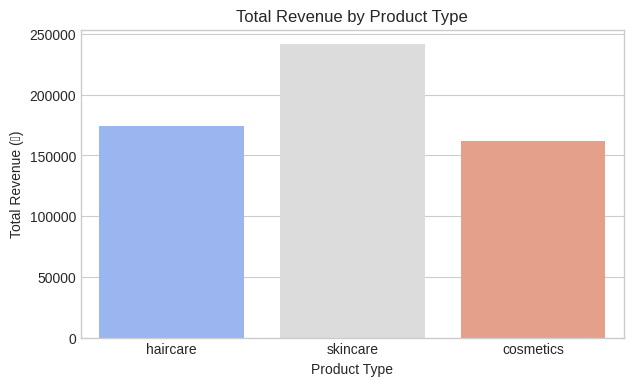

/tmp/ipython-input-2470822008.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='supplier_name', y='defect_rates', data=df, ax=ax[0], palette='Reds', errorbar=None) # Corrected ci to errorbar
/tmp/ipython-input-2470822008.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='supplier_name', y='manufacturing_lead_time', data=df, ax=ax[1], palette='Blues', errorbar=None) # Corrected ci to errorbar


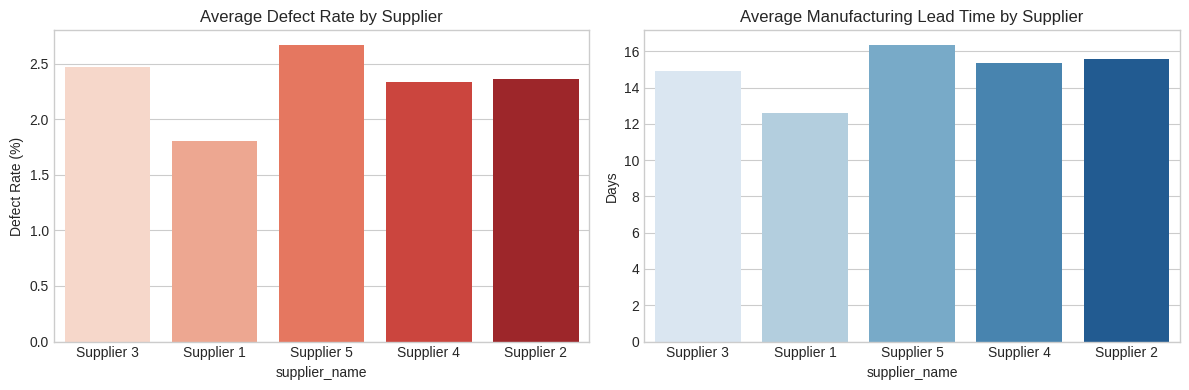

/tmp/ipython-input-2470822008.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shipping_carriers', y='shipping_costs', data=df, palette='Set2')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


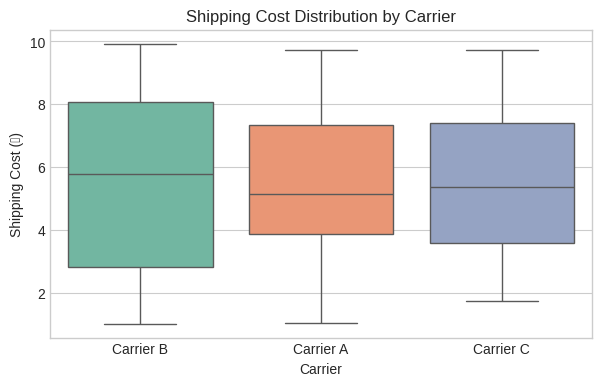

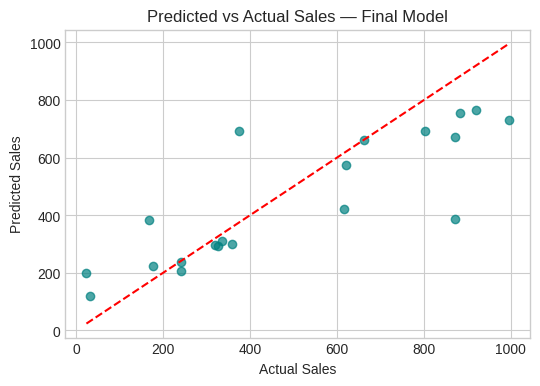

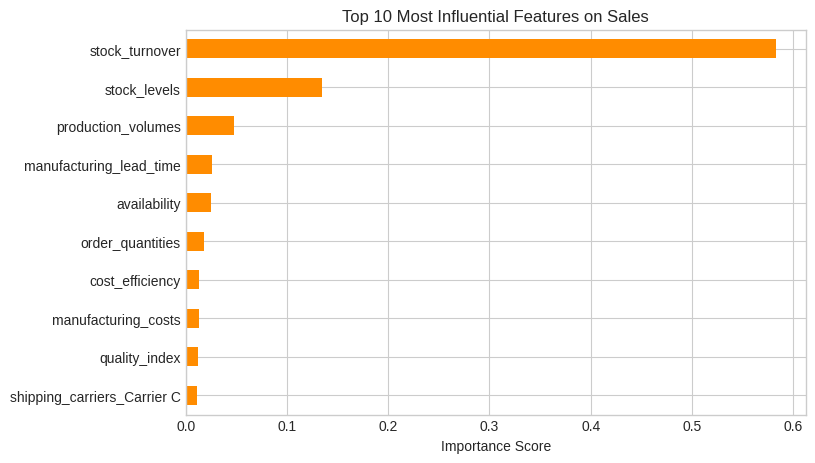


💾 All dashboard charts saved in folder: /content/dashboard_charts


In [ ]:
# =========================================================
# STEP 7 — Visualization Dashboard / KPI Summary
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Import joblib to load model/preprocessor
from sklearn.model_selection import train_test_split # Needed to recreate y_test

plt.style.use("seaborn-v0_8-whitegrid")

# ---------------------------------------------------------
# Load necessary data and model artifacts
# ---------------------------------------------------------
try:
    best_model = joblib.load('/content/randomforest_best_model.joblib')
    preprocessor = joblib.load('/content/preprocessor.joblib')
    feature_names_after_encoding = pd.read_csv('/content/feature_names_after_encoding.csv').iloc[:, 0].tolist()
    print("✅ Loaded best model, preprocessor, and feature names.")

    # Recreate X and y from df (assuming df is available)
    TARGET = 'number_of_products_sold'
    drop_cols = ['sku'] if 'sku' in df.columns else []
    if 'routes' in df.columns and df['routes'].nunique() > 50:
        drop_cols.append('routes')
    features = [c for c in df.columns if c not in drop_cols + [TARGET]]
    X = df[features].copy()
    y = df[TARGET].copy()
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Transform X_test to get y_pred
    X_test_transformed = preprocessor.transform(X_test)
    y_pred = best_model.predict(X_test_transformed)

except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}. Please ensure you have run the previous steps.")
    # Set variables to None or handle appropriately if files are missing
    best_model = None
    preprocessor = None
    feature_names_after_encoding = None
    y_test = pd.Series() # Empty series to prevent errors
    y_pred = np.array([]) # Empty array to prevent errors


# ---------------------------------------------------------
# 1️⃣  KPI SUMMARY (Text + Numbers)
# ---------------------------------------------------------
total_revenue = df['revenue_generated'].sum() if 'revenue_generated' in df.columns else np.nan
avg_profit_margin = df['profit_margin'].mean() * 100 if 'profit_margin' in df.columns else np.nan
# Use avg_lead_time from the processed df if available, otherwise calculate or show NaN
avg_lead_time = df['avg_lead_time'].mean() if 'avg_lead_time' in df.columns else (df['lead_time'].mean() if 'lead_time' in df.columns else np.nan) # Corrected lead time calculation
avg_defects = df['defect_rates'].mean() if 'defect_rates' in df.columns else np.nan
avg_shipping_cost = df['shipping_costs'].mean() if 'shipping_costs' in df.columns else np.nan

print("📈 SUPPLY-CHAIN DASHBOARD SUMMARY")
print("===================================")
print(f"Total Revenue             : ₹{total_revenue:,.2f}")
print(f"Average Profit Margin (%) : {avg_profit_margin:.2f}%")
print(f"Average Lead Time (days)  : {avg_lead_time:.2f}")
print(f"Average Defect Rate (%)   : {avg_defects:.2f}")
print(f"Average Shipping Cost     : ₹{avg_shipping_cost:.2f}")

# ---------------------------------------------------------
# 2️⃣  Revenue by Product Type
# ---------------------------------------------------------
if 'product_type' in df.columns and 'revenue_generated' in df.columns:
    plt.figure(figsize=(7,4))
    sns.barplot(x='product_type', y='revenue_generated', data=df, estimator='sum', errorbar=None, palette='coolwarm') # Corrected ci to errorbar
    plt.title("Total Revenue by Product Type")
    plt.xlabel("Product Type")
    plt.ylabel("Total Revenue (₹)")
    plt.show()

# ---------------------------------------------------------
# 3️⃣  Supplier Performance Dashboard
# ---------------------------------------------------------
if 'supplier_name' in df.columns and 'defect_rates' in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    sns.barplot(x='supplier_name', y='defect_rates', data=df, ax=ax[0], palette='Reds', errorbar=None) # Corrected ci to errorbar
    ax[0].set_title("Average Defect Rate by Supplier")
    ax[0].set_ylabel("Defect Rate (%)")

    if 'manufacturing_lead_time' in df.columns:
        sns.barplot(x='supplier_name', y='manufacturing_lead_time', data=df, ax=ax[1], palette='Blues', errorbar=None) # Corrected ci to errorbar
        ax[1].set_title("Average Manufacturing Lead Time by Supplier")
        ax[1].set_ylabel("Days")

    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 4️⃣  Shipping Carrier Performance
# ---------------------------------------------------------
if 'shipping_carriers' in df.columns and 'shipping_costs' in df.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='shipping_carriers', y='shipping_costs', data=df, palette='Set2')
    plt.title("Shipping Cost Distribution by Carrier")
    plt.xlabel("Carrier")
    plt.ylabel("Shipping Cost (₹)")
    plt.show()

# ---------------------------------------------------------
# 5️⃣  Predicted vs Actual Plot (from Step 5)
# ---------------------------------------------------------
# Ensure y_test and y_pred are available from the loaded data
if not y_test.empty and y_pred.size > 0:
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Predicted vs Actual Sales — Final Model")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()
else:
    print("\n❌ Cannot generate Predicted vs Actual plot: y_test or y_pred not available.")


# ---------------------------------------------------------
# 6️⃣  Feature Importance Bar Chart
# ---------------------------------------------------------
# Ensure best_model and feature_names_after_encoding are available
if best_model is not None and hasattr(best_model, 'feature_importances_') and feature_names_after_encoding is not None:
    # Use the loaded feature names for the index
    if len(best_model.feature_importances_) == len(feature_names_after_encoding):
        feat_imp = pd.Series(best_model.feature_importances_, index=feature_names_after_encoding).sort_values(ascending=False)
        plt.figure(figsize=(8,5))
        feat_imp.head(10).plot(kind='barh', color='darkorange')
        plt.title("Top 10 Most Influential Features on Sales")
        plt.xlabel("Importance Score")
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print("\n⚠️ Could not match feature importances to feature names for plotting.")
else:
    print("Feature importance not available or feature names not loaded.")


# ---------------------------------------------------------
# 7️⃣  Save All Charts as Images
# ---------------------------------------------------------
import os
os.makedirs("/content/dashboard_charts", exist_ok=True)

# Save all currently open figures
for i, fig_num in enumerate(plt.get_fignums(), start=1):
    plt.figure(fig_num)
    plt.savefig(f"/content/dashboard_charts/chart_{i}.png")

print("\n💾 All dashboard charts saved in folder: /content/dashboard_charts")